Дорогой студент!

В данном домашнем задании предоставляется возможность поработать с задачей по распознаванию позитивных и негативных отзывы людей по автомобилю Tesla. База для обучения содержит два текстовых файла с рядом строчных отзывов с мнением людей об автомобиле Tesla, соответственно негативного и позитивного содержания. Ссылка на скачивание базы уже включена в ноутбук задания.


Необходимо выполнить следующие действия:

  1. Загрузите саму базу по ссылке и подговьте файлы базы для обработки.
  2. Создайте обучающую и проверочную выборки, обратив особое внимание на балансировку базы: количество примеров каждого класса должно быть примерно одного порядка.
  3. Подготовьте выборки для обучения и обучите сеть. Добейтесь результата точности сети в 85-90% на проверочной выборке.
   


**Импорт библиотек, загрузка базы и подготовка её к предобработке.**

In [ ]:
# Работа с массивами данных
import numpy as np 

# Работа с таблицами
import pandas as pd

# Отрисовка графиков
import matplotlib.pyplot as plt

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation 
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Заполнение последовательностей до определенной длины
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Рисование схемы модели
from tensorflow.keras.utils import plot_model

# Вывод объектов в ячейке colab
from IPython.display import display


# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Загрузка датасетов из облака google
import gdown

# Для работы с файлами в Colaboratory
import os                                                            

# Отрисовка графиков
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l7/tesla.zip', None, quiet=True)

'tesla.zip'

**Деление общей базы отзывов на данные для обучения и проверки.**

In [ ]:
# Распаковка архива в папку writers
!unzip -qo tesla.zip -d tesla/

# Просмотр содержимого папки
!ls tesla

'Негативный отзыв.txt'	'Позитивный отзыв.txt'


**Загрузка текста из файлов, преобразование в одну строку.**

In [ ]:
# Объявляем функции для чтения файла. На вход отправляем путь к файлу
def read_text(file_name):

  # Задаем открытие нужного файла в режиме чтения              
  read_file = open(file_name, 'r')

  # Читаем текст     
  text = read_file.read()

  # Переносы строки переводим в пробелы              
  text = text.replace("\n", " ")

  # Возвращаем текст файла       
  return text                          

# Объявляем интересующие нас классы
class_names = ["Негативный отзыв", "Позитивный отзыв"]

# Считаем количество классов 
num_classes = len(class_names)

**Тексты в один список.**

In [ ]:
import os
# Создаём список под тексты для обучающей выборки
texts_list = []

# Циклом проводим итерацию по текстовым файлам в папке отзывов
for j in os.listdir('/content/tesla/'):

  # Добавляем каждый файл в общий список для выборки
        texts_list.append(read_text('/content/tesla/' + j))
        
        # Выводим на экран сообщение о добавлении файла
        print(j, 'добавлен в обучающую выборку')

Негативный отзыв.txt добавлен в обучающую выборку
Позитивный отзыв.txt добавлен в обучающую выборку


In [ ]:
# Узнаем объём каждого текста в словах и символах
texts_len = [len(text) for text in texts_list]

# Устанавливаем "счётчик" номера текста
t_num = 0

# Выводим на экран  информационное сообщение
print(f'Размеры текстов по порядку (в токенах):')

# Циклом проводим итерацию по списку с объёмами текстов
for text_len in texts_len:

  # Запускаем "счётчик" номера текста
  t_num += 1
  
  # Выводим на экран сообщение о номере и объёме текста
  print(f'Текст №{t_num}: {text_len}')

Размеры текстов по порядку (в токенах):
Текст №1: 134535
Текст №2: 213381


Далее рассчитаем, сколько символов составит 80% объёма каждого текста, чтобы по полученному индексу отделить эти 80% на обучающую и оставшиеся 20% на проверочную выборку. Эти значения необходимы для подготовки деления на выборки слайсингом по индексу.

In [ ]:
# Создаём список с вложенным циклом по длинам текстов, где i - 100% текста, i/5 - 20% текста 
train_len_shares = [(i - round(i/5)) for i in texts_len]

# Устанавливаем "счётчик" номера текста
t_num = 0

text_train = [0,0]
text_test = [0,0]


# Циклом проводим итерацию по списку с объёмами текстов равными 80% от исходных
for train_len_share in train_len_shares:

  # Запускаем "счётчик" номера текста
  t_num += 1
  
  # Выводим на экран сообщение о номере и объёме текста в 80% от исходного
  print(f'Доля 80% от текста №{t_num}: {train_len_share} символов')


  text_train[t_num-1] = texts_list[t_num-1][:train_len_share]
  text_test[t_num-1] = texts_list[t_num-1][:train_len_share:]






Доля 80% от текста №1: 107628 символов
Доля 80% от текста №2: 170705 символов


Импортируем функцию **chain()** для добавления текстов в каждую выборку.

---
 Дополнительная информация: ([База знаний УИИ  - **"Методы работы со списками: функция chain( )**"](https://colab.research.google.com/drive/1KJKg_WYD8Vq63cciOMBEEAhFpyPv0A0V?usp=sharing/))

---

Производём нарезку (метод слайсинга) по полученному ранее индексу для формирования текстов отдельно для обучающей(80%) и проверочной(20%) выборок:

In [ ]:
from itertools import chain
# Ваше решение

In [ ]:
CLASS_LIST = ['Позитивный отзыв', 'Негативный отзыв']
for cls in range(len(CLASS_LIST)):
  print(f'Класс: {CLASS_LIST[cls]}')
  print(f'train: {text_train[cls][:200]}')
  print(f'test: {text_test[cls][:200]}')
  print()

Класс: Позитивный отзыв
train: После 170 на трассе она чувствует себя неуверенно.  Кстати сидения очень удобными тоже не назовёшь. ... Это моё личное впечатление об автомобиле. Шляпа, а не авто, все не продумано до мелочей. Пока эт
test: После 170 на трассе она чувствует себя неуверенно.  Кстати сидения очень удобными тоже не назовёшь. ... Это моё личное впечатление об автомобиле. Шляпа, а не авто, все не продумано до мелочей. Пока эт

Класс: Негативный отзыв
train:  Водитель наслаждается от такого авто и вождения  Красивая машина нужно брать  Тесла топ, тащусь от этой тачки Плюсы - зарядка бесплатная.  Машина топ Технологии по автоматизации не стоят на месте! Кр
test:  Водитель наслаждается от такого авто и вождения  Красивая машина нужно брать  Тесла топ, тащусь от этой тачки Плюсы - зарядка бесплатная.  Машина топ Технологии по автоматизации не стоят на месте! Кр



In [ ]:
# Объем словаря для токенизатора
VOCAB_SIZE = 10000

# Длина отрезка текста (окна) в словах                        
WIN_SIZE   = 1000

# Шаг окна разбиения текста на векторы                         
WIN_HOP    = 100                          

# Токенайзер из Keras для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', 
                          lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

In [ ]:
# Получаем словарь частотности 
tokenizer.fit_on_texts(text_train)

In [ ]:
#построение словаря в виде пар слово-индекс
items = list(tokenizer.word_index.items())

In [ ]:
#Вывод нескольких наиболее часто встречающихся слов
print(items[:20])

[('неизвестное_слово', 1), ('и', 2), ('в', 3), ('не', 4), ('на', 5), ('это', 6), ('что', 7), ('с', 8), ('тесла', 9), ('за', 10), ('а', 11), ('как', 12), ('у', 13), ('машина', 14), ('я', 15), ('по', 16), ('для', 17), ('но', 18), ('то', 19), ('очень', 20)]


In [ ]:
#Преобразуйте обучающие и проверочные тексты в последовательность индексов согласно частотному словарю Токенайзера:
seq_train = tokenizer.texts_to_sequences(text_train)
seq_test = tokenizer.texts_to_sequences(text_test)

In [ ]:
#Функция деления последовательности индексов на отрезки скользящим окном

In [ ]:
def split_sequence(sequence,   # Последовательность индексов
                   win_size,   # Размер окна для деления на примеры
                   hop):       # Шаг окна

    # Последовательность разбивается на части до последнего полного окна
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, hop)]

In [ ]:
#Функция формирования выборок из индексов и соответствующих классам меток в формате One Hot Encoding

In [ ]:
def vectorize_sequence(seq_list,    # Список последовательностей индексов 
                       win_size,    # Размер окна для деления на примеры
                       hop):        # Шаг окна

    # В списке последовательности следуют в порядке их классов (их кол-во сповпадает с кол-вом классов)
    class_count = len(seq_list)

    # Списки для исходных векторов и категориальных меток класса
    x, y = [], []

    # Для каждого класса:
    for cls in range(class_count):

        # Разбиение последовательности класса cls на отрезки
        vectors = split_sequence(seq_list[cls], win_size, hop)

        # Добавление отрезков в выборку

        x += vectors
        
        # Для всех отрезков класса cls добавление меток класса в виде OHE
        y += [utils.to_categorical(cls, class_count)] * len(vectors)

    # Возврат результатов как numpy-массивов
    return np.array(x), np.array(y)

In [ ]:
# Формирование обучающей выборки
x_train, y_train = vectorize_sequence(seq_train, WIN_SIZE, WIN_HOP) 
# Формирование тестовой выборки
x_test, y_test = vectorize_sequence(seq_test, WIN_SIZE, WIN_HOP)

# Проверка формы сформированных данных
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(408, 1000) (408, 2)
(408, 1000) (408, 2)


In [ ]:
# На входе .sequences_to_matrix() ожидает список, .tolist() выполняет преобразование к типу данных 'список'
x_train_01 = tokenizer.sequences_to_matrix(x_train.tolist())
x_test_01 = tokenizer.sequences_to_matrix(x_test.tolist())

# Выводим форму обучающей выборки в виде матрицы Bag of Words
print(x_train_01.shape)       
# Выводим фрагмент отрезка обучающего текста в виде Bag of Words
print(x_train_01[0][0:100])

(408, 10000)
[0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1.]


In [ ]:
#Функция компиляции и обучения модели нейронной сети

In [ ]:
def compile_train_model(model,
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=50,
                        batch_size=128,
                        figsize=(20, 5)):
  
  model.compile(optimizer=optimizer,                                 # Компиляция модели для обучения на данных вида Bag of Words
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
  


  model.summary()
  
  history = model.fit(x_train,                            # Обучающая выборка Bag of Words
                      y_train,                               # Метки классов обучающей выборки
                      epochs=epochs,                             # Количество эпох
                      batch_size=batch_size,                         # Размер подвыборки для одного шага по данным на эпохе
                      validation_data=(x_val, y_val))   # Проверочная выборка и метки классов проверочной выборки


# Вывод графиков точности и ошибки
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
  fig.suptitle('График процесса обучения модели')
  ax1.plot(history.history['accuracy'],
           label='Доля верных ответов на обучающем наборе')
  ax1.plot(history.history['val_accuracy'],
           label='Доля верных ответов на проверочном наборе')
  ax1.xaxis.get_major_locator().set_params(integer=True)
  ax1.set_xlabel('Эпоха обучения')
  ax1.set_ylabel('Доля верных ответов')
  ax1.legend()

  ax2.plot(history.history['loss'],
           label='Ошибка на обучающем наборе')
  ax2.plot(history.history['val_loss'],
           label='Ошибка на проверочном наборе')
  ax2.xaxis.get_major_locator().set_params(integer=True)
  ax2.set_xlabel('Эпоха обучения')
  ax2.set_ylabel('Ошибка')
  ax2.legend()
  plt.show()


In [ ]:
# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()    

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    accu = '\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean())
    print('\n'+ accu)


In [ ]:
# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model, 
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=CLASS_LIST,
                             title='',
                             optimizer='adam',
                             epochs=50,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):

    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model, 
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test, 
               class_labels=class_labels, 
               title=title,
               figsize=cm_size)
    


In [ ]:
#Создаём линейную модель сети для обучения на Bag OF Words:

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 184)               1840184   
                                                                 
 dense_9 (Dense)             (None, 86)                15910     
                                                                 
 dense_10 (Dense)            (None, 33)                2871      
                                                                 
 batch_normalization_2 (Batc  (None, 33)               132       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 33)                0         
                                                                 
 dense_11 (Dense)            (None, 2)                 68        
                                                      

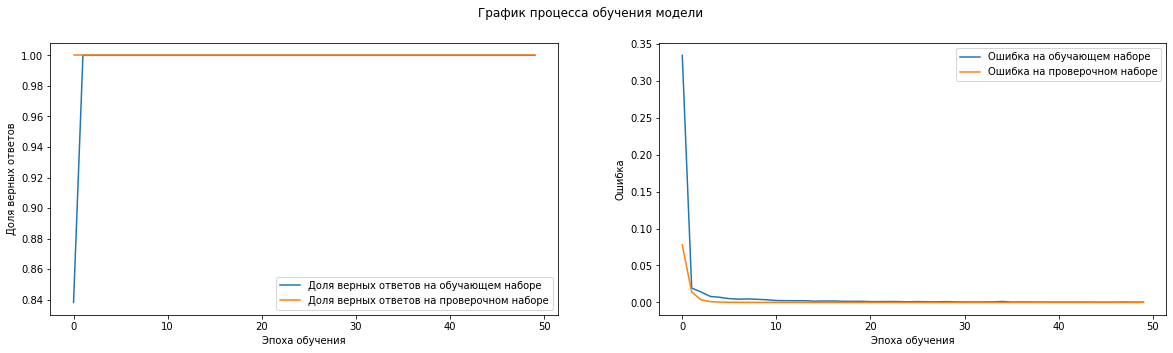

13/13 [==============================] - 0s 6ms/step


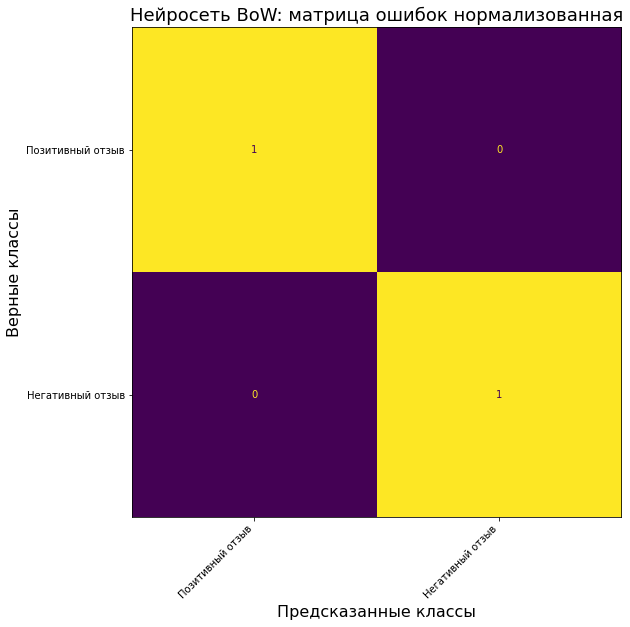

----------------------------------------------------------------------------------------------------
Нейросеть: BoW
Класс: Позитивный отзыв     100% сеть отнесла к классу Позитивный отзыв     - ВЕРНО :-)
Класс: Негативный отзыв     100% сеть отнесла к классу Негативный отзыв     - ВЕРНО :-)


Средняя точность распознавания: 100%


In [ ]:
model_BoW = Sequential()                                            # Создание последовательной модели нейросети
model_BoW.add(Dense(184, input_dim=VOCAB_SIZE, activation="relu"))  # Первый полносвязный слой
model_BoW.add(Dense(86, activation="relu"))                         # Второй полносвязный слой
model_BoW.add(Dense(33, activation="relu"))                         # Третий полносвязный слой
model_BoW.add(BatchNormalization())                                 # Слой пакетной нормализации
model_BoW.add(Dropout(0.1))                                         # Слой регуляризации Dropout
model_BoW.add(Dense(2, activation='softmax'))                       # Выходной полносвязный слой

compile_train_eval_model(model_BoW,
                         x_train_01, y_train,
                         x_test_01, y_test,
                         class_labels=CLASS_LIST,
                         title='BoW')